In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from weather_tools import state_years
from energy_tools import read_region

In [2]:
df_NY_temperature = state_years('NY', 2015, 2019)

In [3]:
df_NY_temperature.head()

MEAN_T
DATE              
2015-01-01    25.3
2015-01-02    29.6
2015-01-03    34.6
2015-01-04    33.9
2015-01-05    45.8

In [4]:
df_NY_energy = read_region('New York')

In [5]:
df_NY_energy.head()

Forecast   Demand
Date       Hour                   
2015-07-01 1      16045.0  16891.0
           2          0.0  16027.0
           3          0.0  15541.0
           4          0.0  15283.0
           5          0.0  15304.0

In [6]:
rolling_mean = df_NY_energy.groupby(level=0)['Demand'].sum().rolling(7, win_type='boxcar').mean()

In [9]:
rolling_mean.head(10)

Date
2015-07-01              NaN
2015-07-02              NaN
2015-07-03              NaN
2015-07-04              NaN
2015-07-05              NaN
2015-07-06              NaN
2015-07-07    465424.428571
2015-07-08    473463.000000
2015-07-09    477186.142857
2015-07-10    487240.142857
Name: Demand, dtype: float64

In [10]:
rolling_mean.index[183]

Timestamp('2015-12-31 00:00:00')

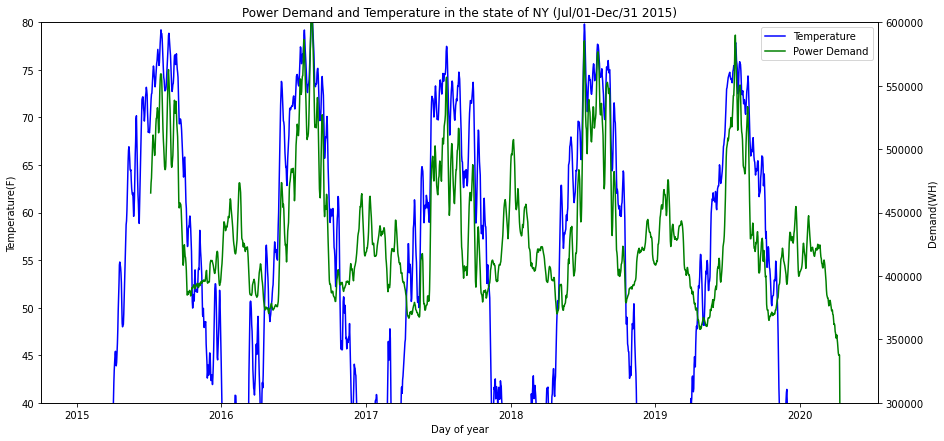

In [11]:
fig,ax1 =plt.subplots()
fig.set_size_inches(15, 7)

ax2 = ax1.twinx()

line1, =ax1.plot(df_NY_temperature.index, df_NY_temperature['MEAN_T'].rolling(7, win_type='boxcar').mean().values,'b-', label = 'Temperature')
line2, =ax2.plot(rolling_mean.index,rolling_mean.values,'g-', label = 'Power Demand')

lines = [line1, line2]

ax1.legend(lines, [l.get_label() for l in lines])

ax1.set_ylim(40,80)
ax2.set_ylim(300000,600000)

ax1.set_xlabel('Day of year')
ax1.set_ylabel('Temperature(F)')
ax2.set_ylabel('Demand(WH)')

ax1.set_title('Power Demand and Temperature in the state of NY (Jul/01-Dec/31 2015)')

plt.show()

In [30]:
ratio_D2T = rolling_mean.to_frame().merge(df_NY_temperature, left_index = True,right_index = True, how ='inner')

In [31]:
ratio_D2T.head()

Demand  MEAN_T
2015-07-01     NaN    70.2
2015-07-02     NaN    73.3
2015-07-03     NaN    70.1
2015-07-04     NaN    69.1
2015-07-05     NaN    68.0

In [32]:
ratio_D2T.dropna(inplace =True)
ratio_D2T['Demand/Temperature'] = ratio_D2T.apply(lambda x: x.Demand/x.MEAN_T, axis =1)

In [33]:
ratio_D2T.head()

Demand  MEAN_T  Demand/Temperature
2015-07-07  465424.428571    73.6         6323.701475
2015-07-08  473463.000000    77.6         6101.327320
2015-07-09  477186.142857    77.3         6173.171318
2015-07-10  487240.142857    70.7         6891.656900
2015-07-11  497674.000000    74.6         6671.233244

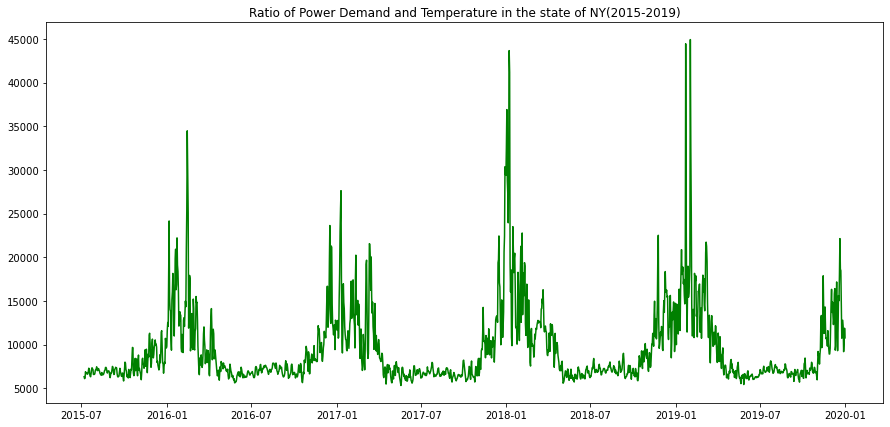

In [36]:
fig,ax =plt.subplots()
fig.set_size_inches(15, 7)

ax.plot(ratio_D2T.index, ratio_D2T['Demand/Temperature'],'g-')
ax.set_title('Ratio of Power Demand and Temperature in the state of NY(2015-2019)')
# ax.set_yscale('log')
ax.set_yscale('linear')
plt.show()